In [19]:
import json

In [20]:
size_level_to_function_to_time = {}

for size in ['0.15', '0.25', '0.40']:
    file = open(f'/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/{size}/tmp-times.json',)
    cfile = open('/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/config.json',)
    data = json.load(file)
    config = json.load(cfile)
    
    def decorate_with_level():

        def have_common(list1, list2):
            return sum([element in list1 for element in list2]) > 0

        for proc in data["processes"]:
            ancestors = [p.get("level", 0) for p in data["processes"] if have_common(p["outs"], proc["ins"])]
            ancestors.append(0)
            proc["level"] = max(ancestors) + 1

    def get_level_to_proc():
        level_to_proc = {}
        for proc in data["processes"]:
            lvl = proc["level"]
            tasks = level_to_proc.get(lvl, [])
            tasks.append(proc["config"]["id"])
            level_to_proc[lvl] = tasks
        return level_to_proc

    decorate_with_level()
    level_to_proc = get_level_to_proc()
    
    def get_id_to_process():
        id_to_process = {}
        for proc in data["processes"]:
            id_to_process[proc["config"]["id"]] = proc
        return id_to_process

    id_to_process = get_id_to_process()
    
    level_to_function_to_time = {}

    for level in level_to_proc:
        level_to_function_to_time[level] = {}
        for task_id in level_to_proc[level]:
            proc = id_to_process[task_id]
            executions = level_to_function_to_time[level]
            for function in proc['startTime']:
                e = executions.get(function, [])
                e.append(proc['finishTime'][function] - proc['startTime'][function])
                executions[function] = e
            
    size_level_to_function_to_time[size] = level_to_function_to_time
    

<ipython-input-21-164fb19365f8>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


KeyError: 'lambda-1792'

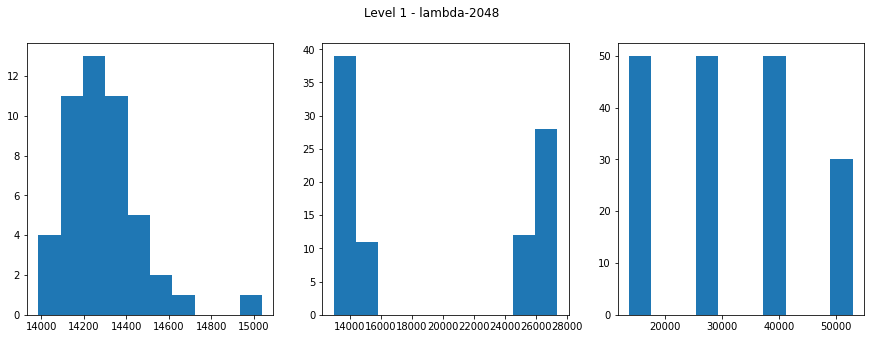

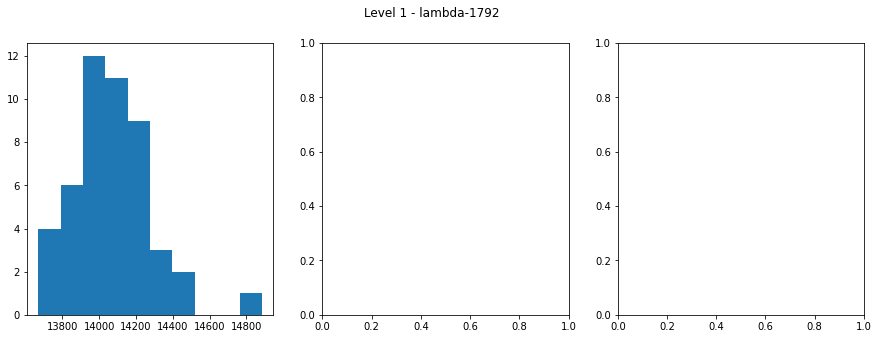

In [21]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15, 5]

small = size_level_to_function_to_time['0.15']
medium = size_level_to_function_to_time['0.25']
large = size_level_to_function_to_time['0.40']

for level in small:
    for function in small[level]:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.suptitle(f'Level {level} - {function}')
        ax1.hist(small[level][function])
        ax2.hist(medium[level][function])
        ax3.hist(large[level][function])
        fig.show()

In [36]:
size ="e200-large"
file = open(f'/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/{size}/tmp-times.json',)
cfile = open('/home/amnich/Documents/magisterka/CloudFunctionOptimizer/time_tests/config.json',)
data = json.load(file)
config = json.load(cfile)

In [37]:
def decorate_with_level():

    def have_common(list1, list2):
        return sum([element in list1 for element in list2]) > 0

    for proc in data["processes"]:
        ancestors = [p.get("level", 0) for p in data["processes"] if have_common(p["outs"], proc["ins"])]
        ancestors.append(0)
        proc["level"] = max(ancestors) + 1

def get_level_to_proc():
    level_to_proc = {}
    for proc in data["processes"]:
        lvl = proc["level"]
        tasks = level_to_proc.get(lvl, [])
        tasks.append(proc["config"]["id"])
        level_to_proc[lvl] = tasks
    return level_to_proc

decorate_with_level()
level_to_proc = get_level_to_proc()

def get_id_to_process():
    id_to_process = {}
    for proc in data["processes"]:
        id_to_process[proc["config"]["id"]] = proc
    return id_to_process

id_to_process = get_id_to_process()

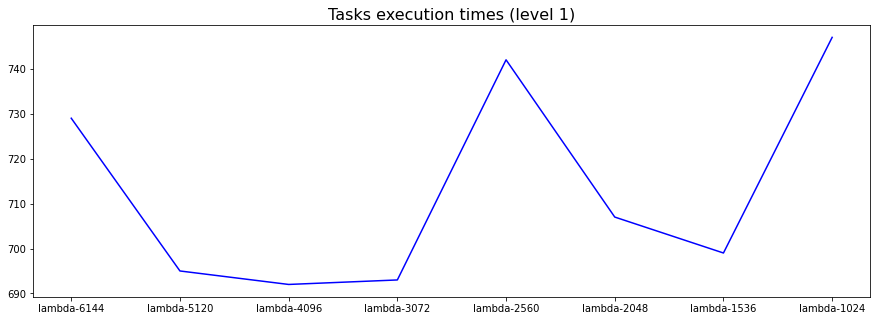

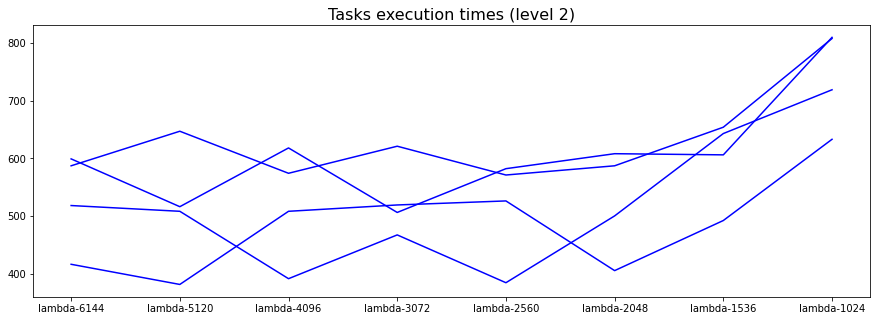

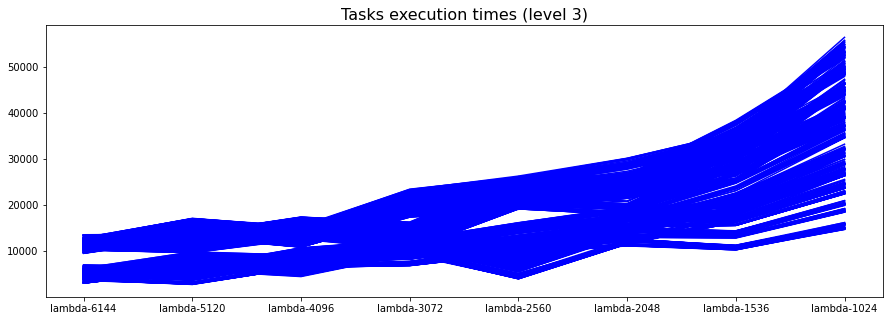

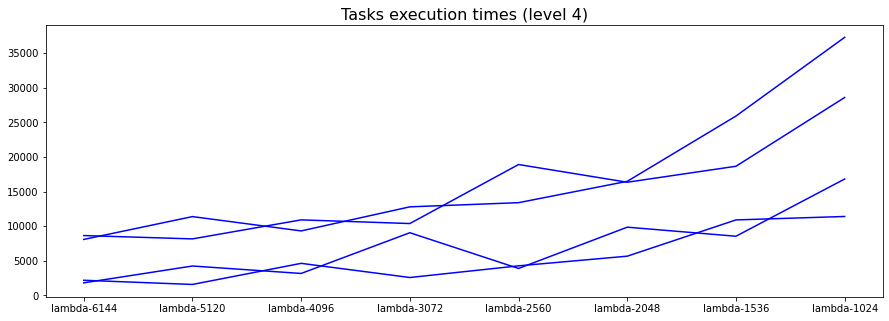

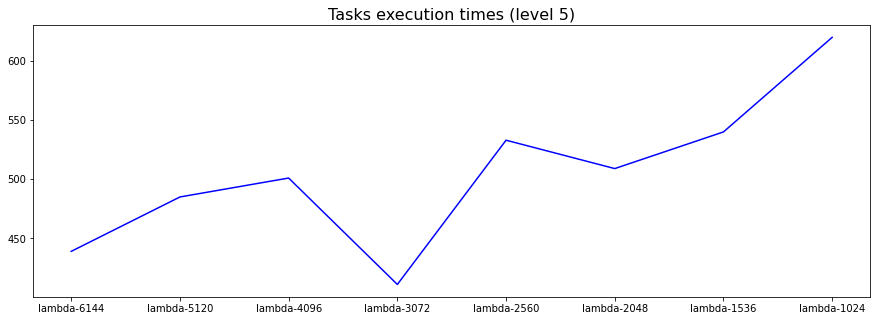

In [38]:
for lvl in level_to_proc:
    functions = data['processes'][1]['startTime'].keys()
    id_to_executions = {}
    for proc_id in level_to_proc[lvl]:
        proc = id_to_process[proc_id]
        id_to_executions[proc_id] = [proc['finishTime'][fun] - proc['startTime'][fun] for fun in functions]

    for proc_id in id_to_executions:
        plt.plot(functions, id_to_executions[proc_id], color='blue')
    plt.title(f'Tasks execution times (level {lvl})',size=16)
    plt.show()